In [152]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
###!conda install -c conda-forge  basemap matplotlib==3.1 -y
# Notice: you maight have to refresh your page and re-run the notebook after installation

# Start by importing libraries

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
import pyproj
%matplotlib inline

# Import data

In [11]:
import csv
import pandas as pd
import numpy as np

#filename = "corpusTop50words.csv"
#filename = "test_poe.csv"
filename = "iris.data"

#Read csv
pdf = pd.read_csv(filename, index_col=False)

dataframe = pdf.to_numpy()

pdf = pd.DataFrame(dataframe)
pdf.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2 : 'petal_length', 3 : 'petal_width', 4 : 'class'}, inplace=True)

X = pdf[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
#y = pdf[['class']]

#X = StandardScaler().fit_transform(pdf)
y = pdf.to_numpy()



# Modeling - generating variables

In [36]:
epsilon = .6
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

# Distinguish Outliers

In [37]:
# First, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True,  True,

In [38]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [39]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1}

# Data Visualization

In [40]:
# Create colors for the clusters.

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


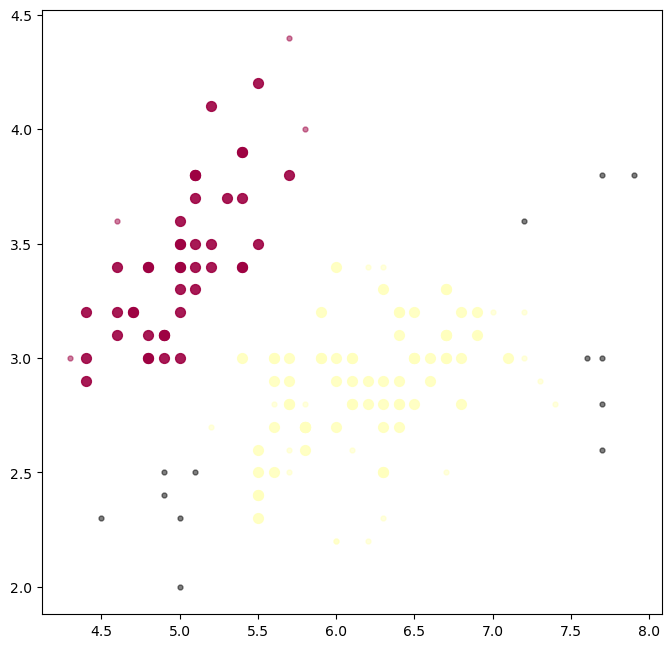

In [41]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)


# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.9)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'.', alpha=0.5)